# url: https://qiita.com/renesisu727/items/844648d6c60e578ce944

# [Python]決定木の理論と実装を徹底解説してみた

## はじめに
今回は、決定木の理論についてまとめていきます。

お付き合い頂ければ幸いです。

## 理論編
それでは最初に、決定木の理論についてまとめていきます。

### 決定木の概要
決定木の可視化すると以下のようになります。

今回はirisデータセットによる分類をscikit-learnのexport_graphvizを用いて可視化しました。

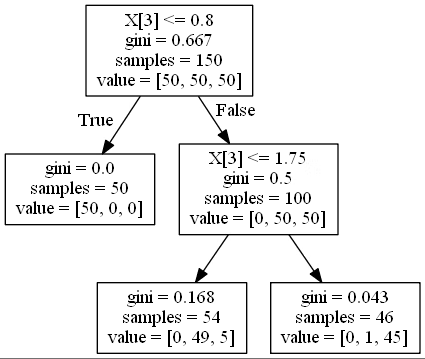

決定木とは、上の画像のようにデータをある条件に従って分割することにより、データの分類または回帰のモデルを作成するアルゴリズムです。分類を行う分類木と回帰を行う回帰木を総称して決定木と呼びます。

かなりシンプルなアルゴリズムのため、他の複雑なアルゴリズムと比較すると精度は出にくい傾向にあります。

しかし、モデルの解釈性が非常に高いです。

モデルの見た目が上の図のように木のように見えることから、決定木と呼ばれています。

代表的なアルゴリズムにCARTやC5.0などがあります。

アルゴリズムについてはこちらの記事を参考にしてください。

ここでは、ニクラス分類を繰り返し行うCARTのアルゴリズムを取り扱っていきます。

## 決定木の基準について
ここまでで決定木のおおよその概要をつかめたと思います。

ここでは、分類木と回帰木の枝分かれの基準について考えていきます。

## 分類木の基準
それでは、分類木はどのような判断基準に従って枝分かれさせていくのかを考えていきましょう。

結論から書くと、分類は不純度が最小になるような分割をする、という基準に基づいて特徴量や閾値を決めています。

不純度とはどれくらい多くのクラスが混じりあっているかを数値にしたもので、誤分類率やジニ指数、交差エントロピー誤差を用いて表されます。一つのノードに一つのクラスの観測地がある状態のとき、不純度は0になります。

## 回帰木の基準
回帰木は、平均二乗誤差で表されるコスト関数を定義し、そのコスト関数の重み付き和が最小となるように特徴量や閾値を選択します。

## 数式について
### 分類木
不純度を数式を用いて表してみましょう。以下の図について考えます。

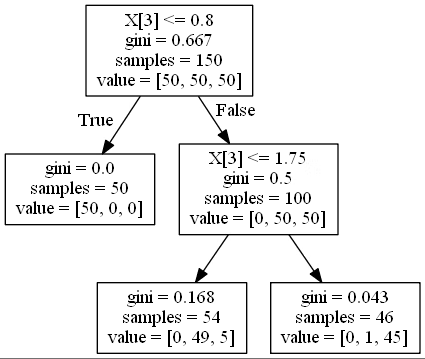

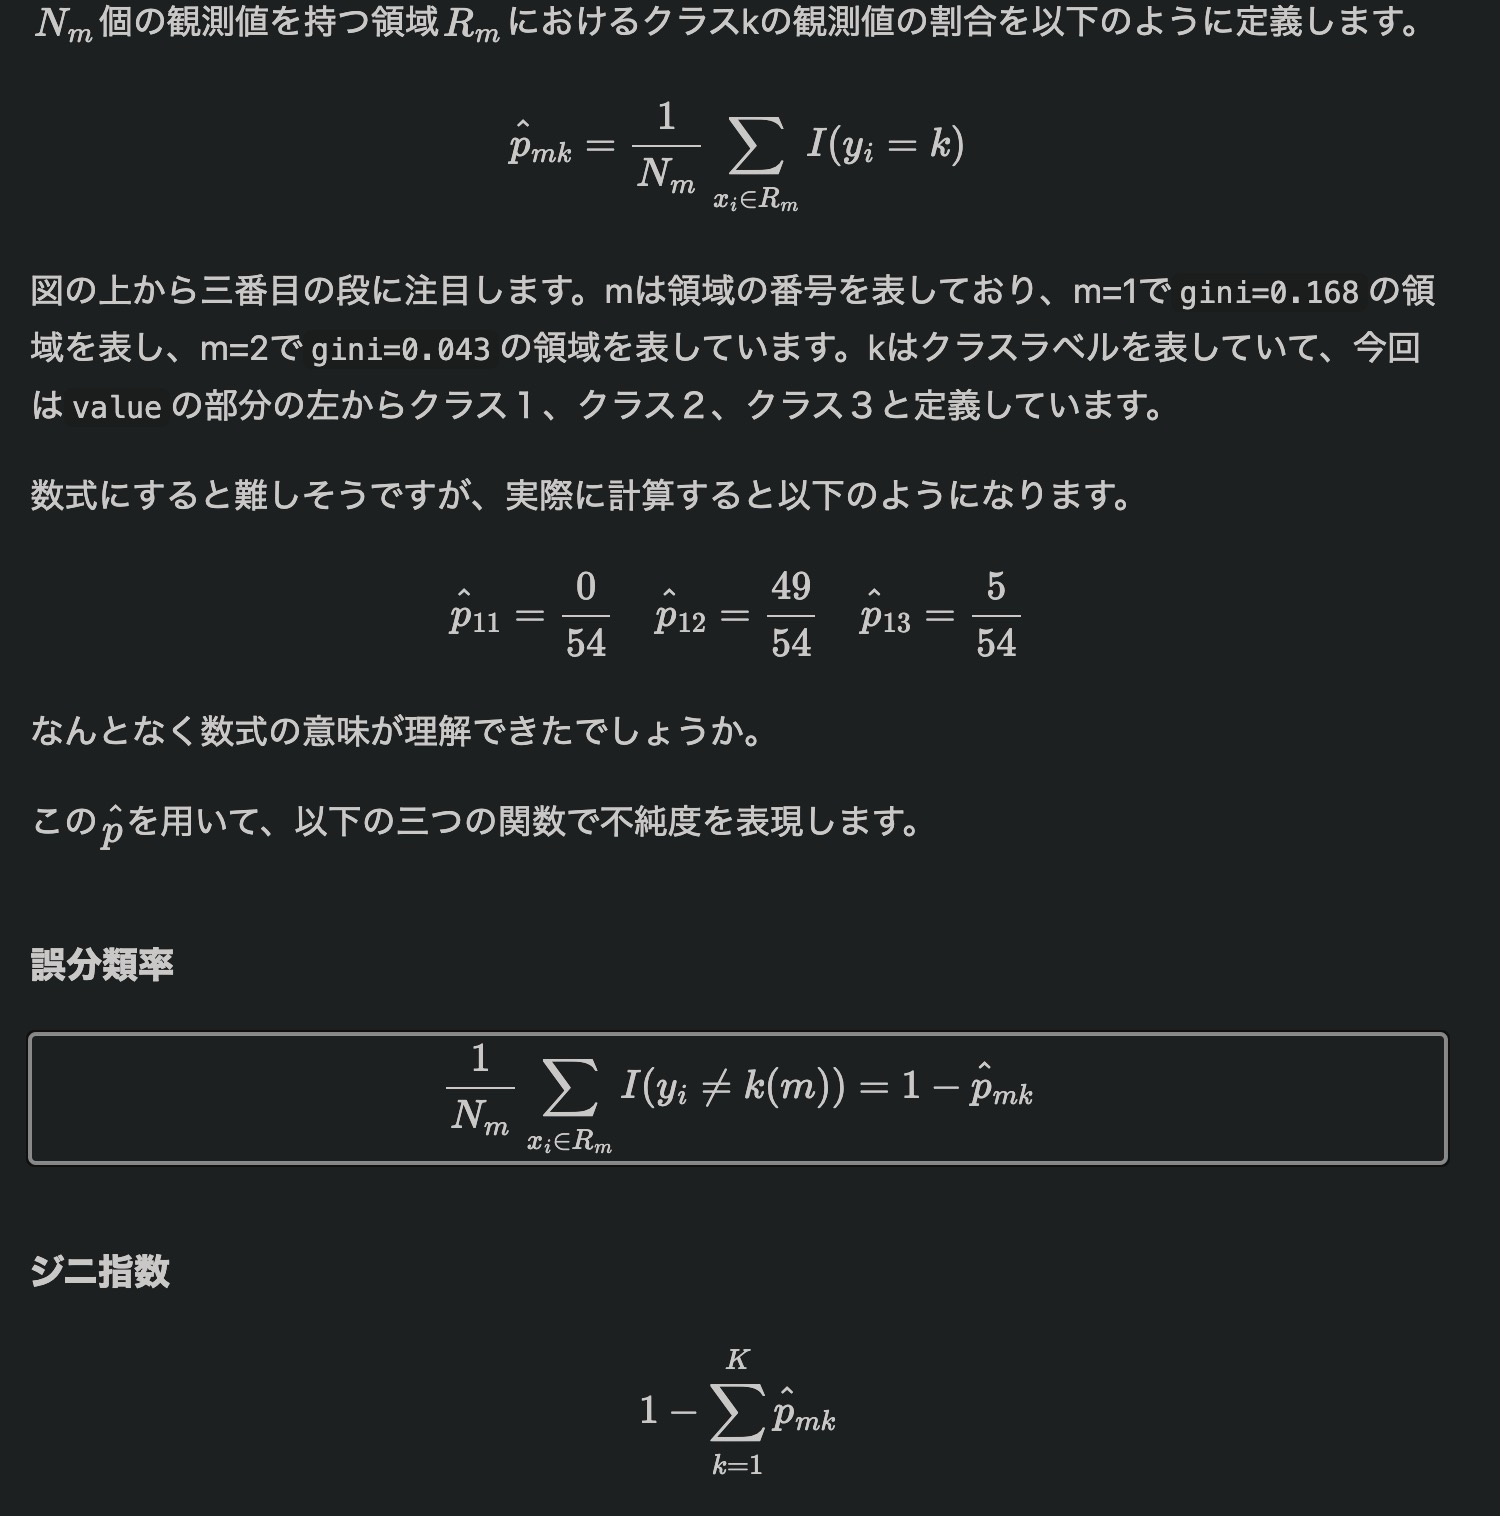

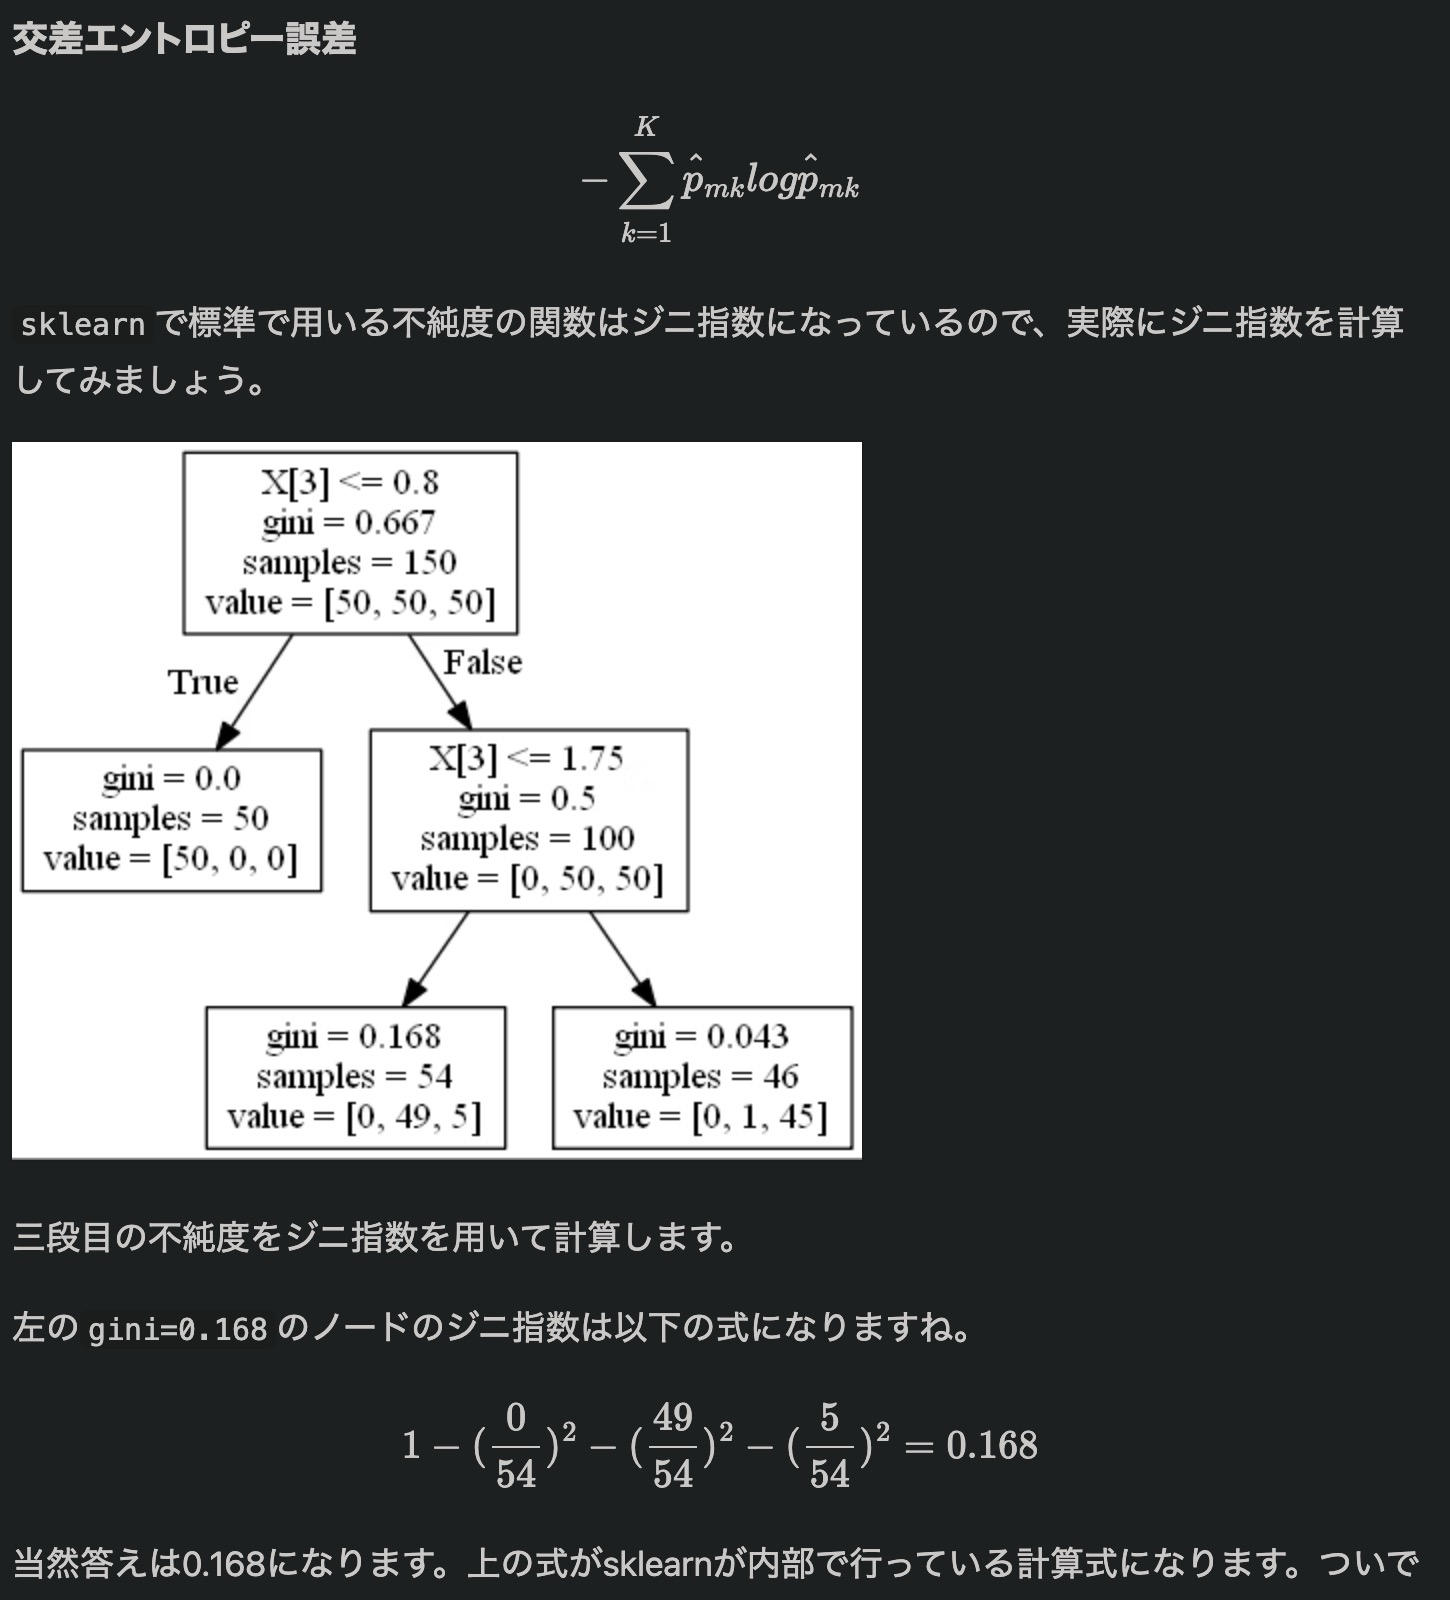

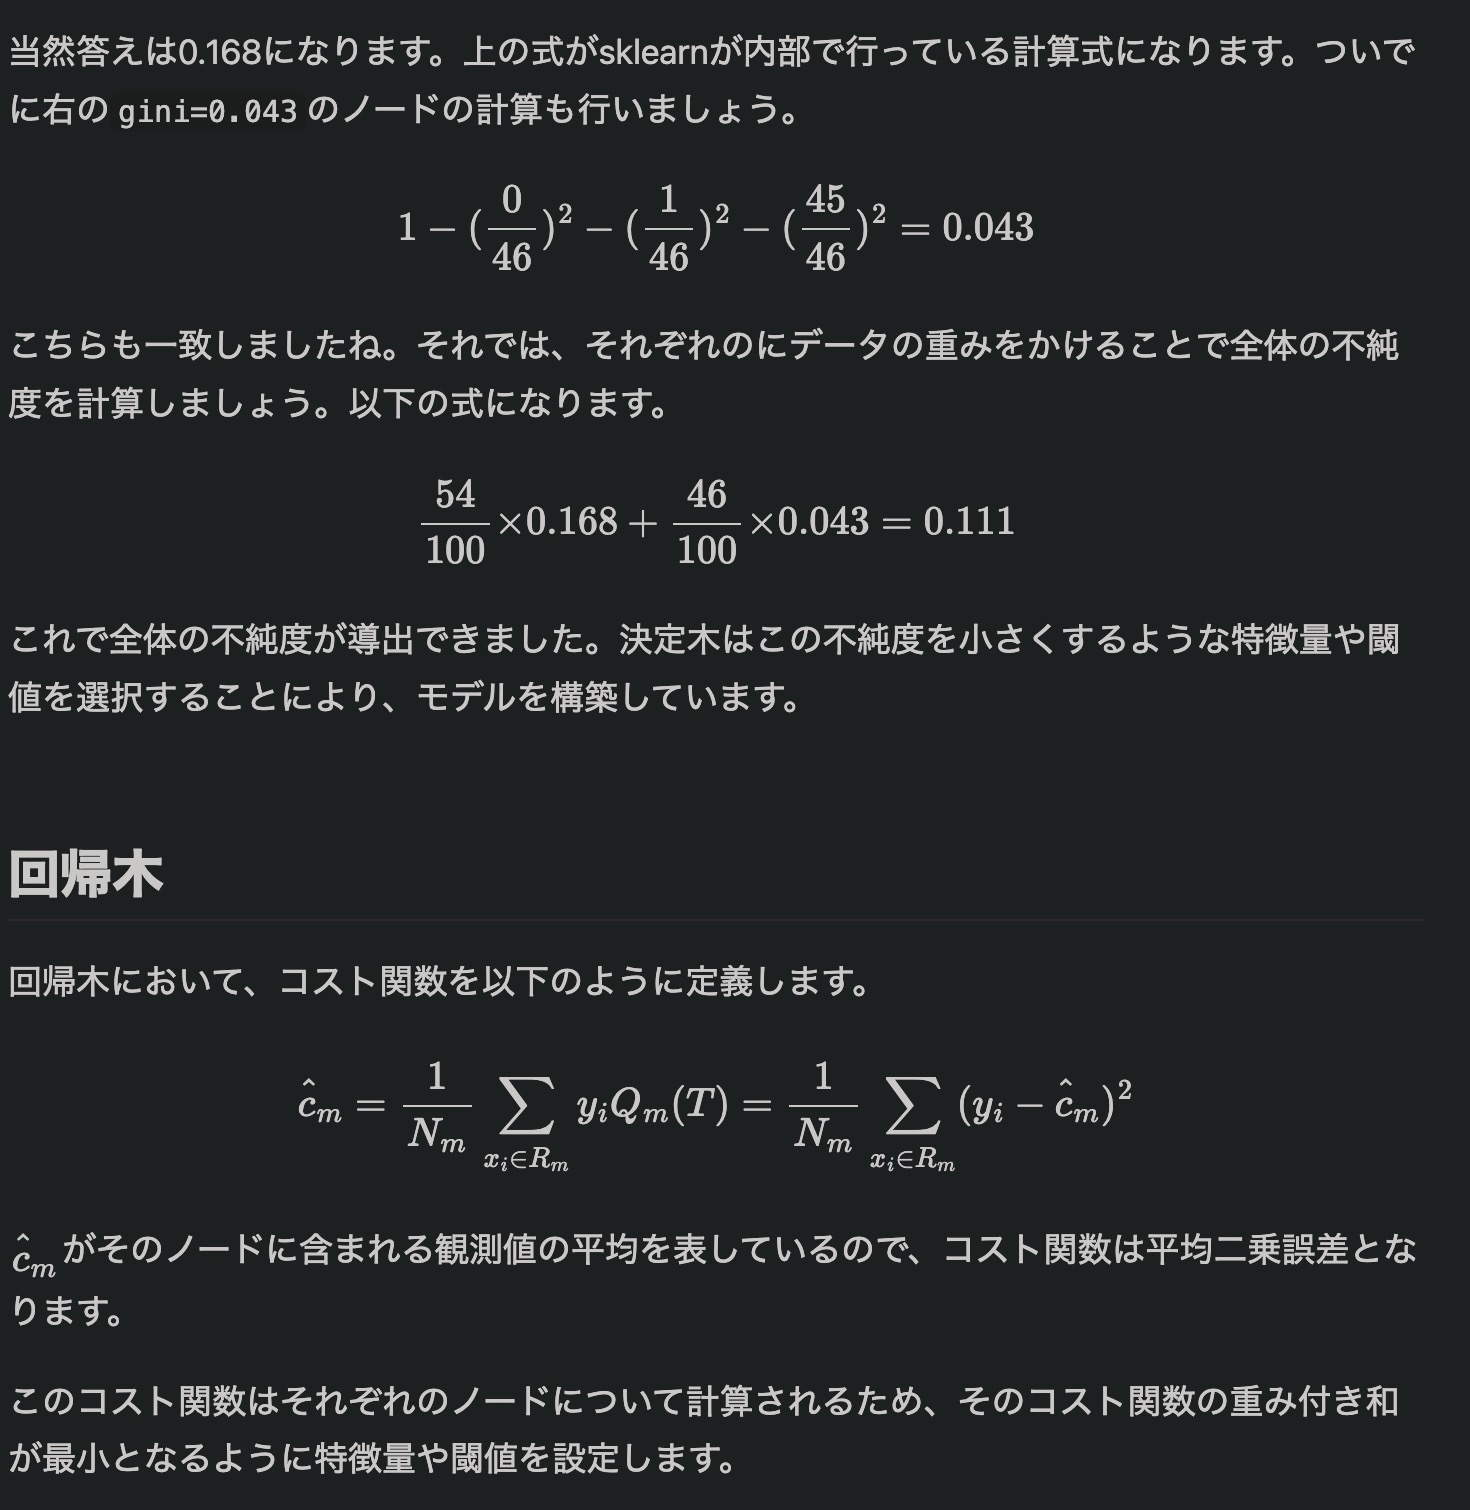

## 実装編
ここまでで、分類木と回帰木の理論が理解できたと思います。それでは、これから決定木の実装を行っていきましょう。

## 分類木の実装
それでは分類木を実装しています。まず、分類するデータを作成します。

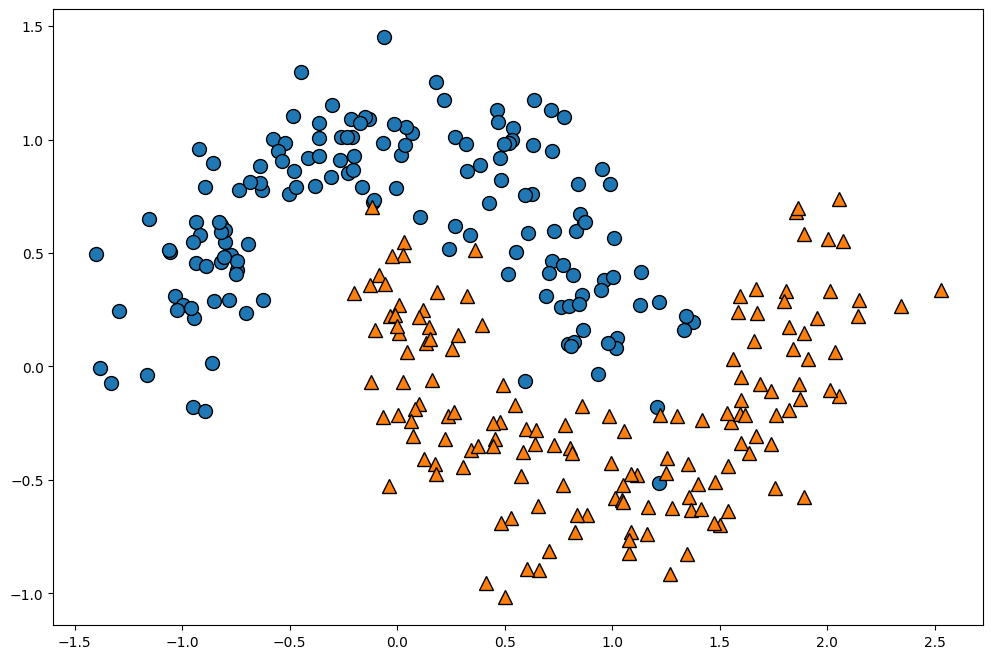

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import mglearn
import graphviz

moons = make_moons(n_samples=300, noise=0.2, random_state=0)
X = moons[0]
Y = moons[1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y)

plt.figure(figsize=(12, 8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.show()

このデータを分類するモデルを作成していきます。

以下のコードです。

In [2]:
clf_model = DecisionTreeClassifier(max_depth=3)
clf_model.fit(X_train, Y_train)
print(clf_model.score(X_test, Y_test))

0.8933333333333333


そこそこの精度がでましたね。

この分類木のモデルを可視化してみましょう。以下のコードです。

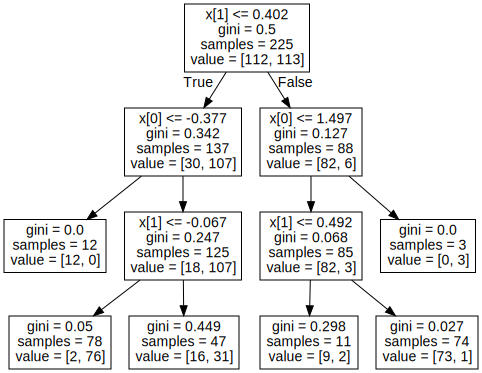

In [3]:
dot_data = export_graphviz(clf_model)
graph = graphviz.Source(dot_data)
graph.render('moon-tree', format='png')
graph

graphvizを用いた可視化については、こちらの記事を参考にしてください。

このように、決定木はモデルの解釈性が非常に高いです。今回のモデルではmax_depth=3としたため、深さが3のモデルになっています。

分類後のモデルを可視化してみましょう。以下のコードです。

url: https://analytics-note.xyz/machine-learning/graphviz-decision-tree/

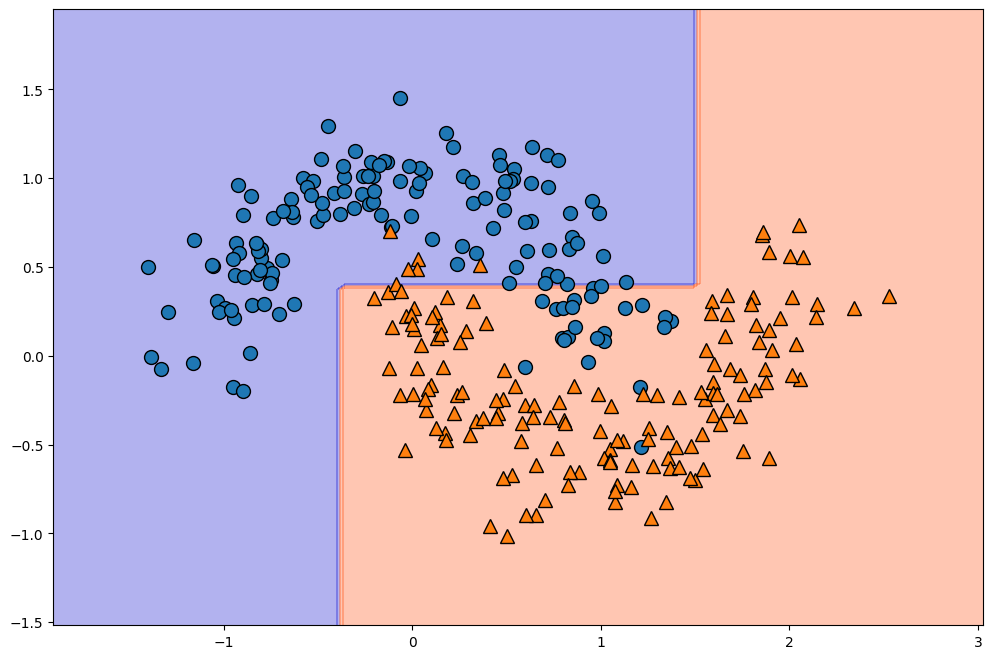

In [4]:
plt.figure(figsize=(12, 8))
_x1 = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
_x2 = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
x1, x2 = np.meshgrid(_x1, _x2)
X_stack = np.hstack((x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1, 1)))
y_pred = clf_model.predict(X_stack).reshape(x1.shape)
custom_cmap = ListedColormap(['mediumblue', 'orangered'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.show()


格子点を用いて色を変化させる方法についてはこちらの記事を参考にしてください。

_x1と_x2でx軸方向とy軸方向の格子点の領域を指定し、x1, x2 = np.meshgrid(_x1, _x2)で格子点を作成しています。

X_stack = np.hstack((x1.ravel().reshape(-1, 1), x2.ravel().reshape(-1, 1)))の部分で100×100の格子点を一次元配列に変化させた後、10000×1の二次元配列に変換し、水平方向に結合して10000×2のデータに変換しています。

y_pred = clf_model.predict(X_stack).reshape(x1.shape)の部分で10000×2のデータを0と1のデータに変換し、それを100×100のデータに変換しています。データを分離する線の片側が0でもう一方が1になります。

plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)の部分で、等高線を描画します。色をcmap=custom_cmapで指定しています。

ここまでで分類木の実装は終了です。

url: https://qiita.com/kazukiii/items/8f0e9559524c0bb0f5ba

## 回帰木の実装
それでは回帰木の実装を行いましょう。

データを準備して描画してみましょう。



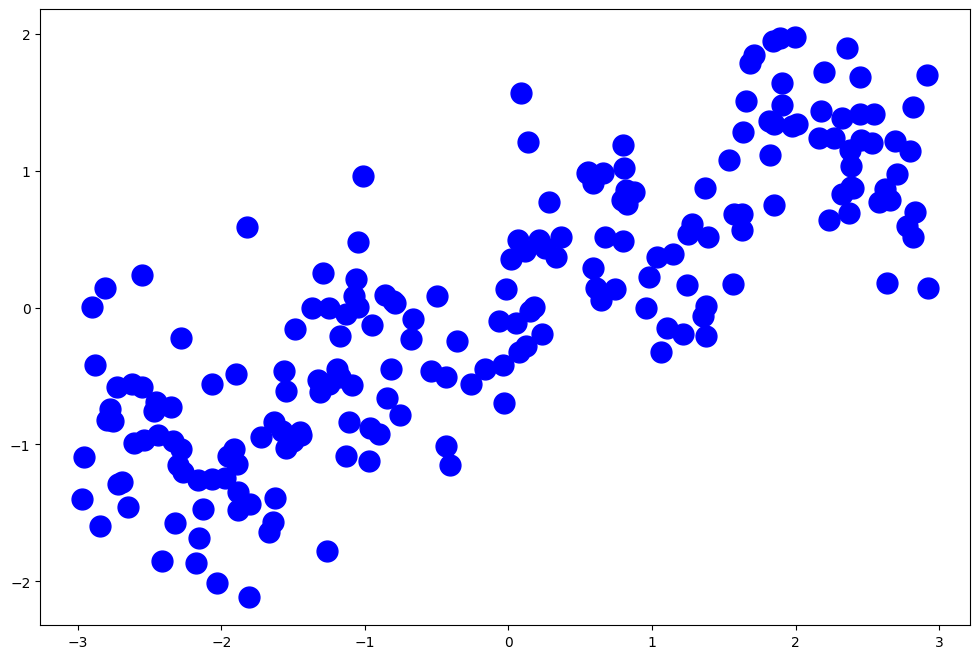

In [5]:
import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)

plt.figure(figsize=(12, 8))
plt.plot(X, Y, 'bo', ms=15)
plt.show()


このようなデータになっています。それではモデルを作成しましょう。

In [6]:
tree_reg_model = DecisionTreeRegressor(max_depth=3)
tree_reg_model.fit(X, Y)
display(tree_reg_model.score(X, Y))

0.7755211625482443

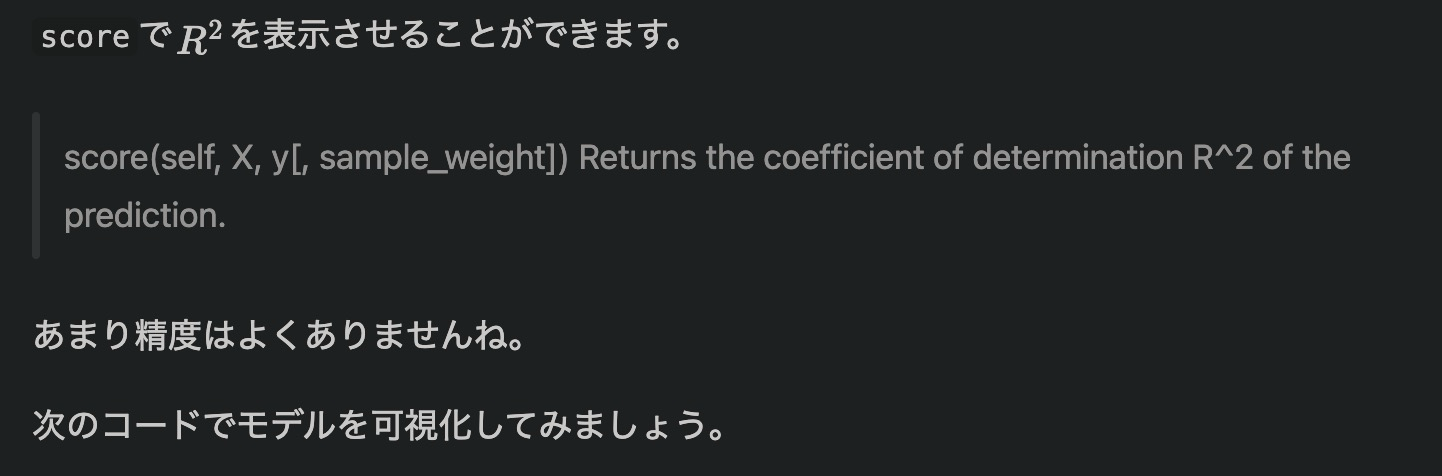

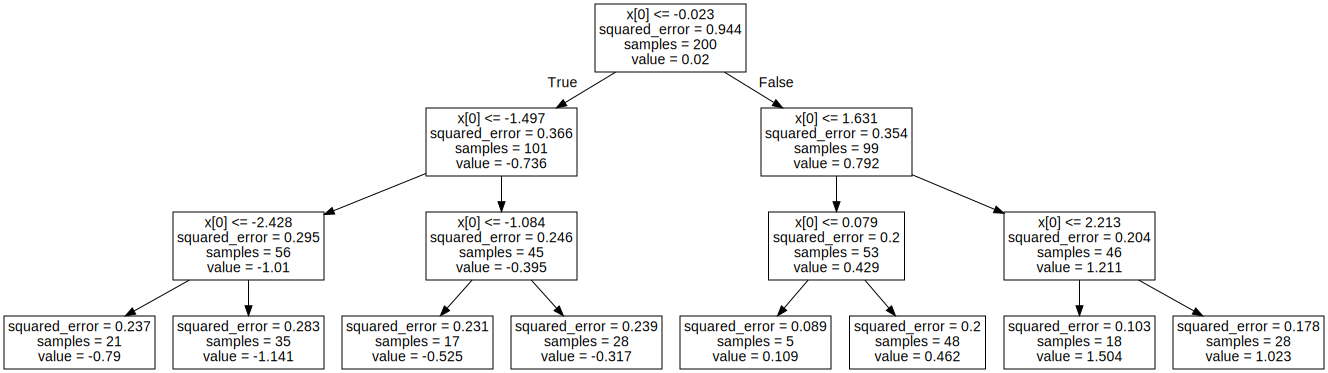

In [7]:
dot_data = export_graphviz(tree_reg_model)
graph = graphviz.Source(dot_data)
graph.render('wave-tree', format='png')
display(graph)

このように、回帰木は(決定木もそうですが)モデルの解釈性がとても良いですね。

それでは、次のコードで回帰直線を図示してみましょう。

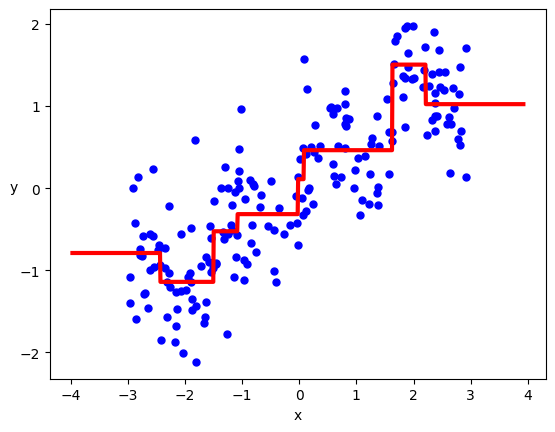

In [8]:
X1 = np.linspace(X.min() - 1, X.max() + 1, 1000).reshape(-1, 1)
y_pred = tree_reg_model.predict(X1)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10, rotation=-0)
plt.plot(X, Y, 'bo', ms=5)
plt.plot(X1, y_pred, 'r-', linewidth=3)
plt.show()

図示してみてわかる通り、あまり正しくはありませんね。

## 深さを指定せずに実装
それでは、次は深さを実装せずに実装してみましょう。

深さを指定しない以外は同じなので、同じ手順は関数にまとめましょう。

In [9]:
import mglearn
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

X, Y = mglearn.datasets.make_wave(n_samples=200)

tree_reg_model_2 = DecisionTreeRegressor()

tree_reg_model_2.fit(X, Y)

display(tree_reg_model_2.score(X, Y))

1.0

R**2が1になりました。いったいどのようなモデルになっているのでしょうか。以下で分岐を図示しましょう。

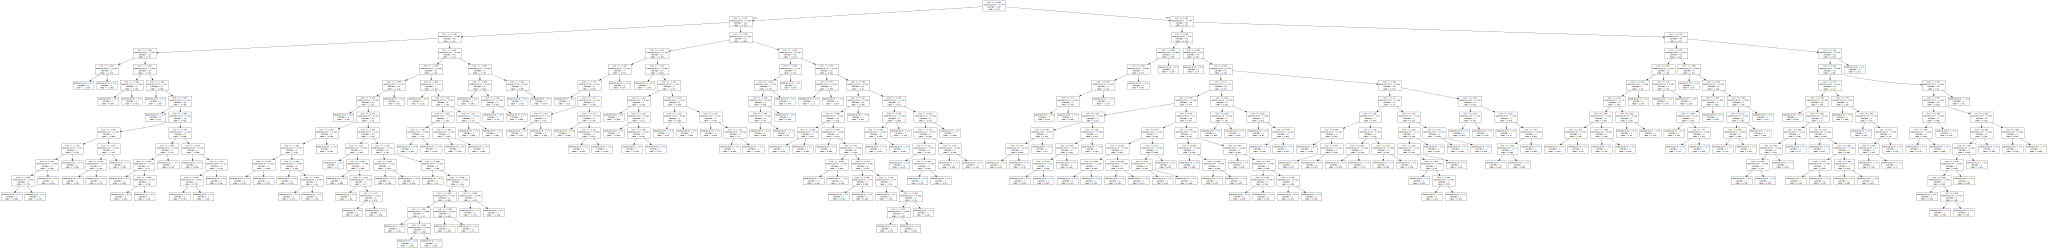

In [10]:
def graph_export(model):
    dot_data = export_graphviz(model)
    graph = graphviz.Source(dot_data)
    graph.render('test', format='png')
    display(graph)

graph_export(tree_reg_model_2)

恐ろしいほどの分岐になりました。もう、どのように分岐しているか読めませんね。

次のコードでモデルを図示しましょう。

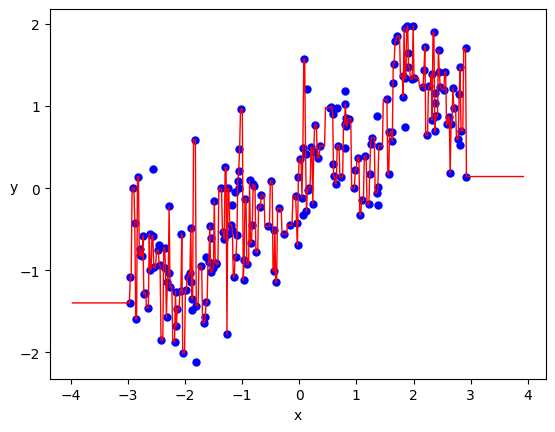

In [11]:
def plot_regression_predictions(tree_reg, x, y):
    x1 = np.linspace(x.min() - 1, x.max() + 1, 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x', fontsize=10)
    plt.ylabel('y', fontsize=10, rotation=-0)
    plt.plot(x, y, 'bo', ms=5)
    plt.plot(x1, y_pred, 'r-', linewidth=1)
    plt.show()

plot_regression_predictions(tree_reg_model_2, X, Y)

上の図を見て頂ければ分かりますが、これは明らかに過学習になっていますね。

これでは未知のデータを予測することができないので、適切に木の深さを設定する大切さが理解できると思います。